In [10]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [109]:
import numpy as np
import pandas as pd

In [133]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [160]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import text
from sqlalchemy import extract

In [161]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [162]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare (engine, reflect=True)

In [163]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [164]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [165]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
year_precip = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= '2016-8-23', measurement.date <= '2017-8-24').\
        order_by(measurement.date).all()
year_precip

[('2017-01-01', 0.0),
 ('2017-01-01', 0.29),
 ('2017-01-01', 0.0),
 ('2017-01-01', None),
 ('2017-01-01', 0.03),
 ('2017-01-01', 0.03),
 ('2017-01-02', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-02', 0.01),
 ('2017-01-02', 0.01),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', None),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.18),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.42),
 ('2017-01-05', 0.06),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.59),
 ('2017-01-06', 0.01),
 ('2017-01-06', 0.1),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.06),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-08', 0

In [167]:
# Calculate the date 1 year ago from the last data point in the database
lastYear = dt.date(2017,8,23) - dt.timedelta(days=365)
print(lastYear)

2016-08-23


In [168]:
# Perform a query to retrieve the data and precipitation scores
all_scores = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()

In [169]:
# Save the query results as a Pandas DataFrame and set the index to the date column
year_precip_df = pd.DataFrame(year_precip).dropna()
year_precip_df.head(12)

,date,prcp
0,2017-01-01,0.00
1,2017-01-01,0.29
2,2017-01-01,0.00
4,2017-01-01,0.03
5,2017-01-01,0.03
6,2017-01-02,0.00
7,2017-01-02,0.00
8,2017-01-02,0.01
9,2017-01-02,0.01
10,2017-01-02,0.00


In [170]:
# Sort the dataframe by date
year_precip_df = year_precip_df.set_index("date")
year_precip_df.head(12)

,prcp
date,
2017-01-01,0.00
2017-01-01,0.29
2017-01-01,0.00
2017-01-01,0.03
2017-01-01,0.03
2017-01-02,0.00
2017-01-02,0.00
2017-01-02,0.01
2017-01-02,0.01


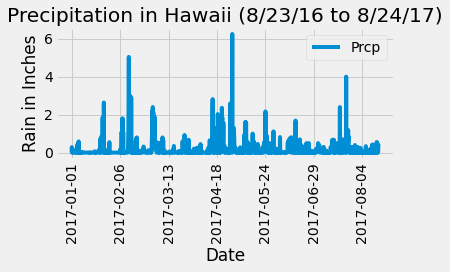

In [171]:
# Use Pandas Plotting with Matplotlib to plot the data
year_precip_df.plot()
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation in Hawaii (8/23/16 to 8/24/17)")
plt.legend(["Prcp"])
plt.xticks(rotation='90')
plt.tight_layout()
plt.show()

In [172]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_precip_df.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [173]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station))
print(f'{station} stations in the dataset')

<class 'sqlalchemy.ext.automap.station'> stations in the dataset


In [174]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station,func.count(measurement.station)).\
        group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [175]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(measurement.tobs),
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
                
session.query(*sel).filter(measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

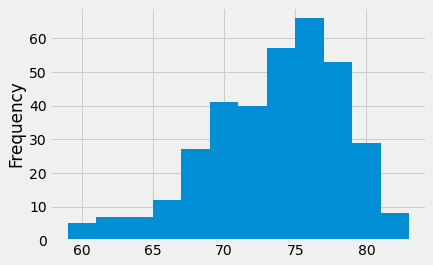

In [176]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#used most active station measurements. station = 'USC00519281'
most_active_tobs = session.query(measurement.tobs).\
                filter(measurement.station=='USC00519281').\
                filter(measurement.date >= lastYear).\
                order_by(measurement.date.desc()).all()

x = [x[0] for x in most_active_tobs]


plt.hist(x, bins=12)
plt.ylabel('Frequency')
plt.show()

## Bonus Challenge Assignment

In [177]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [178]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps = calc_temps('2017-04-07' , '2017-16-07')
temps

[(58.0, 76.55375, 87.0)]

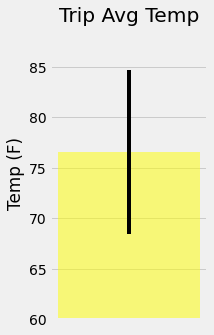

In [179]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = temps[0][1] - temps[0][0]
upper = temps[0][2] - temps[0][1]

plt.figure(figsize=(2.5,5))
plt.bar(0, temps[0][1], yerr=[upper-lower], color='yellow', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()

In [180]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rainfall(start_date, end_date):
    return session.query(measurement.station,
                         station.name,
                         measurement.prcp.label('rainfall'),
                         station.latitude,
                         station.longitude,
                         station.elevation).\
                            group_by(measurement.station).\
                            join(station, measurement.station == station.station).\
                            filter(measurement.date >= start_date).\
                            filter(measurement.date <= end_date).\
                            order_by('rainfall desc').all()
rainfall('2017-04-07' , '2017-16-07')

CompileError: Can't resolve label reference for ORDER BY / GROUP BY / DISTINCT etc. Textual SQL expression 'rainfall desc' should be explicitly declared as text('rainfall desc')

In [181]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [182]:
# calculate the daily normals for your trip
#get daily normals

dates=[]
daily_normals_Three_AVG=[]
daily_normals_TMAX=[]
daily_normals_TMIN=[]
daily_normals_TAVG=[]

trip_month=8
trip_days=range(1, 16)

def daily_normals():
    
    for i in range(1,16):
        results=session.query(measurement.date.label("dates"), func.max(measurement.tobs).label("max_tobs"),\
                             func.min(measurement.tobs).label("min_tobs"),func.avg(measurement.tobs).label("avg_tobs")).\
                             filter(extract('month', measurement.date)==trip_month).\
                             filter(extract('day', measurement.date)== i ).group_by(measurement.date).order_by(measurement.date)
        results
        for res in results.all():
             print( res)
        
        res
        TMAX = res.max_tobs
        TMIN= res.min_tobs
        TAVG= res.avg_tobs
        Date= res.dates
        
        data = [TMAX, TMIN, TAVG]
        #avg = [float(sum(col))/len(col) for col in zip(*data)]

        dates.append(Date)
        #daily_normals_Three_AVG.append(avg)
        daily_normals_TMAX.append(TMAX)
        daily_normals_TMIN.append(TMIN)
        daily_normals_TAVG.append(TAVG)
        
daily_normals()

('2010-08-01', 77.0, 71.0, 73.42857142857143)
('2011-08-01', 78.0, 67.0, 73.375)
('2012-08-01', 79.0, 71.0, 75.85714285714286)
('2013-08-01', 79.0, 75.0, 76.83333333333333)
('2014-08-01', 83.0, 73.0, 77.42857142857143)
('2015-08-01', 79.0, 73.0, 77.4)
('2016-08-01', 78.0, 73.0, 76.16666666666667)
('2017-08-01', 77.0, 72.0, 74.5)
('2010-08-02', 76.0, 70.0, 73.22222222222223)
('2011-08-02', 77.0, 70.0, 73.625)
('2012-08-02', 78.0, 68.0, 73.5)
('2013-08-02', 78.0, 70.0, 74.57142857142857)
('2014-08-02', 81.0, 73.0, 77.71428571428571)
('2015-08-02', 84.0, 76.0, 80.0)
('2016-08-02', 80.0, 72.0, 76.57142857142857)
('2017-08-02', 83.0, 73.0, 79.0)
('2010-08-03', 77.0, 70.0, 73.11111111111111)
('2011-08-03', 78.0, 71.0, 75.25)
('2012-08-03', 78.0, 72.0, 74.57142857142857)
('2013-08-03', 79.0, 72.0, 76.66666666666667)
('2014-08-03', 83.0, 74.0, 78.33333333333333)
('2015-08-03', 85.0, 75.0, 80.0)
('2016-08-03', 82.0, 74.0, 78.42857142857143)
('2017-08-03', 81.0, 76.0, 79.0)
('2010-08-04', 77.0, 

In [ ]:
# push each tuple of calculations into a list called `normals`

In [ ]:
# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [183]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
Daily_normals_df= pd.DataFrame({'Date': dates, 'TMAX': daily_normals_TMAX, 'TMIN': daily_normals_TMIN,'TAVG': daily_normals_TAVG,})
Daily_normals_df.set_index('Date', inplace=True, )
Daily_normals_df.head()

,TMAX,TMIN,TAVG
Date,,,
2017-08-01,77.0,72.0,74.5
2017-08-02,83.0,73.0,79.0
2017-08-03,81.0,76.0,79.0
2017-08-04,82.0,77.0,80.0
2017-08-05,82.0,77.0,80.0


<Figure size 648x792 with 0 Axes>

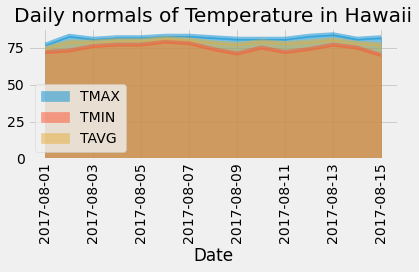

In [187]:
# Plot the daily normals as an area plot with `stacked=False`
fig = plt.figure(figsize=(9, 11))
ax = Daily_normals_df.plot(kind='area', stacked=False, title='Daily normals of Temperature in Hawaii')
ax.set_xlabel('Date')
plt.xticks(rotation='90')
plt.tight_layout()
plt.savefig('Daily normals of Temperature in Hawaii.png', bbox_inches = 'tight')
plt.show()